# 第五章 分类数据的绘制

我们之前探讨了如何使用散点图和回归模型拟合来可视化两个变量之间的关系，以及如何在其他分类变量的层次之间进行展示。 当然，还有一大类问题就是分类数据的问题了？ 在这种情况下，散点图和回归模型方法将不起作用。当然，有几个观察可视化这种关系的选择，我们将在本章中讨论。

非常实用的方法是将Seaborn的分类图分为三类，将分类变量每个级别的每个观察结果显示出来，显示每个观察分布的抽象表示，以及应用统计估计显示的权重趋势和置信区间：

第一个包括函数swarmplot()和stripplot()
第二个包括函数boxplot()和violinplot()
第三个包括函数barplot()和pointplt()
在了解他们如何接受数据传入方面，尽管每个参数都聚有控制应用于该数据可视化细节的特定参数，但这些功能都共享一个基本的API。

这与之前的regplot()和lmplot()的关系非常相似（未禾备注：在seaborn的构架中很容易分成这样两类用途相似，使用有所差异的替代方案函数）。在Seaborn中，相对低级别和相对高级别的方法用于定制分类数据的绘制图，上面列出的函数都是低级别的，他们绘制在特定的matplotlib轴上。还有更高级别的factorplot()（未禾备注：这是一个非常简明的快速绘制函数，具体用法会在最后有详细介绍），它将这些功能与FacetGrid结合，以便在面板的网格中应用分类图像。

使用“整洁”格式的DataFrame调用这些函数是最简单和最好的，尽管较低级别的函数也接受宽形式的DataFrames或简单的观察向量。见下面的例子。

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

np.random.seed(sum(map(ord, "categorical")))
titanic = sns.load_dataset("titanic")
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")

## 分类散点图

显示分类变量级别中某些定量变量的值的一种简单方法使用stripplot()，它会将分散图概括为其中一个变量是分类的：

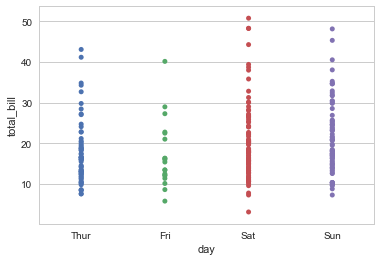

In [2]:
sns.stripplot(x="day", y="total_bill", data=tips);

在条纹图中，散点图通常将重叠。这使得很难看到数据的完整分布。一个简单的解决方案是使用一些随机的“抖动”调整位置（仅沿着分类轴）

未禾备注：抖动是平时可视化中的常用的观察“密度”的方法，除了使用参数抖动，特定的抖动需求也可以用numpy在数据上处理实现

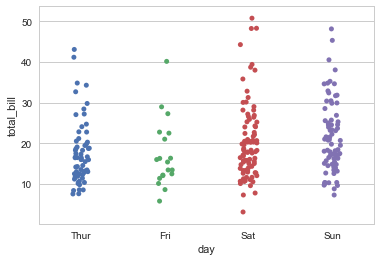

In [3]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True);

不同的方法是使用函数swarmplot()，它使用避免重叠点的算法将分类轴上的每个散点图点定位：

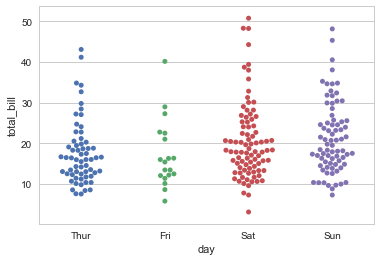

In [4]:
sns.swarmplot(x="day", y="total_bill", data=tips);

当然也可以传入hue参数添加多个嵌套的分类变量。高于分类轴上的颜色和位置时冗余的，现在每个都提供有两个变量之一的信息：

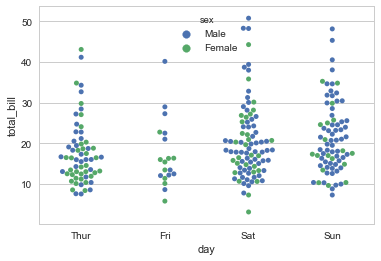

In [5]:
sns.swarmplot(x="day", y="total_bill", hue="sex",data=tips);

一般来说，Seaborn分类绘图功能试图从数据中推断类别的顺序。 如果您的数据有一个pandas分类数据类型，那么类别的默认顺序可以在那里设置。 对于其他数据类型，字符串类型的类别将按照它们在DataFrame中显示的顺序进行绘制，但是数组类别将被排序：

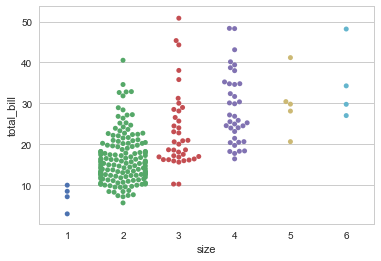

In [6]:
sns.swarmplot(x="size", y="total_bill", data=tips);